Test samples (Logistic Regression): (18,)
tuned hyperparameters (best parameters): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy: 0.8464285714285713
Test Accuracy Logistic Regression: 0.8333333333333334


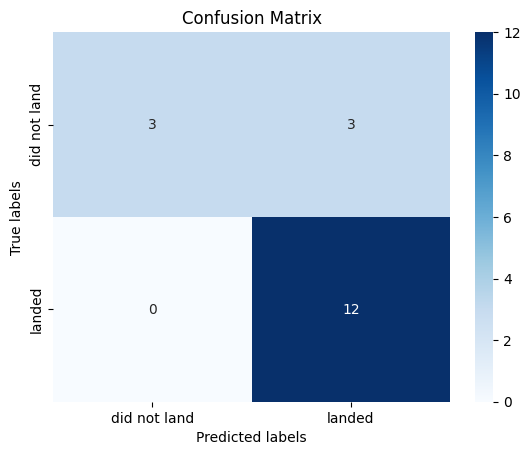

tuned hyperparameters (best parameters): {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy: 0.832142857142857
Test Accuracy SVM: 0.8888888888888888


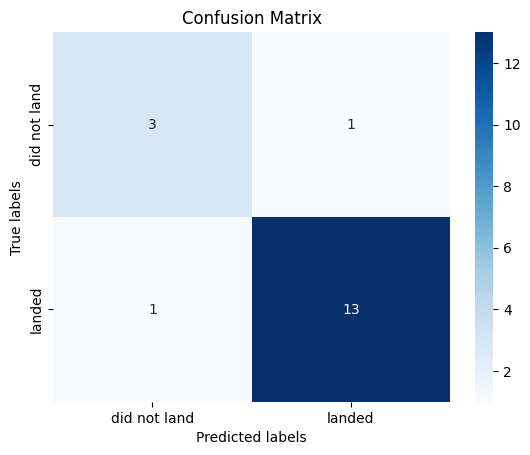

tuned hyperparameters (best parameters): {'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
accuracy: 0.8892857142857145
Test Accuracy Decision Tree: 0.8888888888888888


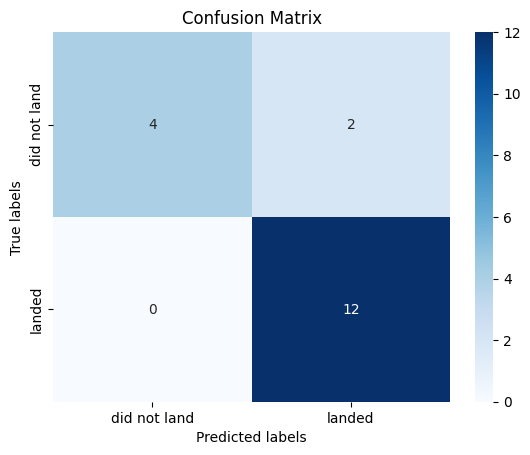

tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
accuracy: 0.8732142857142857
Test Accuracy KNN: 0.7222222222222222


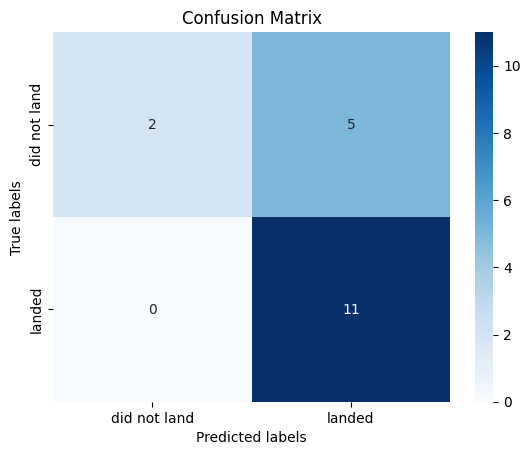

Logistic Regression: 0.8333
SVM: 0.8889
Decision Tree: 0.8889
KNN: 0.7222

Best performing model: SVM


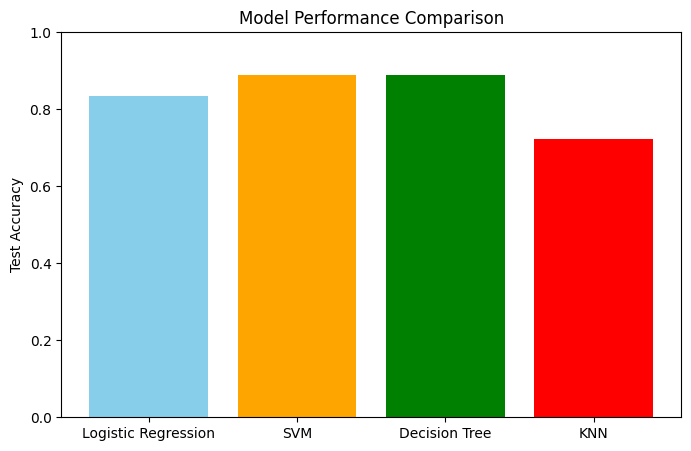

In [3]:
# ==============================
# IMPORTS
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import shuffle

# Função de plot de matriz de confusão
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'landed'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# ==============================
# LOAD DATA
# ==============================
data = pd.read_csv(
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
)
X = pd.read_csv(
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
)

# ==============================
# TASK 1 – Criar Y
# ==============================
Y = data['Class']  # Pandas Series

# ==============================
# TASK 2 – Padronização
# ==============================
X_numeric = X.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# ==============================
# TASK 3 – Split Logistic Regression
# ==============================
X_train_lr, X_test_lr, Y_train_lr, Y_test_lr = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=2
)
print("Test samples (Logistic Regression):", Y_test_lr.shape)

# ==============================
# TASK 4 – Logistic Regression + GridSearchCV
# ==============================
parameters_lr = {"C": [0.01, 0.1, 1], "penalty": ["l2"], "solver": ["lbfgs"]}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters_lr, cv=10)
logreg_cv.fit(X_train_lr, Y_train_lr)

print("tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("accuracy:", logreg_cv.best_score_)

# ==============================
# TASK 5 – Avaliar Logistic Regression
# ==============================
test_accuracy_lr = logreg_cv.score(X_test_lr, Y_test_lr)
print("Test Accuracy Logistic Regression:", test_accuracy_lr)

yhat_lr = logreg_cv.predict(X_test_lr)
plot_confusion_matrix(Y_test_lr, yhat_lr)

# ==============================
# TASK 6 – SVM + GridSearchCV
# ==============================
X_train_svm, X_test_svm, Y_train_svm, Y_test_svm = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=42
)

parameters_svm = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters_svm, cv=10)
svm_cv.fit(X_train_svm, Y_train_svm)

print("tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("accuracy:", svm_cv.best_score_)

# ==============================
# TASK 7 – Avaliar SVM
# ==============================
test_accuracy_svm = svm_cv.score(X_test_svm, Y_test_svm)
print("Test Accuracy SVM:", test_accuracy_svm)

yhat_svm = svm_cv.predict(X_test_svm)
plot_confusion_matrix(Y_test_svm, yhat_svm)

# ==============================
# TASK 8 – Decision Tree + GridSearchCV
# ==============================
X_train_tree, X_test_tree, Y_train_tree, Y_test_tree = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=123
)

parameters_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters_tree, cv=10)
tree_cv.fit(X_train_tree, Y_train_tree)

print("tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("accuracy:", tree_cv.best_score_)

# ==============================
# TASK 9 – Avaliar Decision Tree
# ==============================
test_accuracy_tree = tree_cv.score(X_test_tree, Y_test_tree)
print("Test Accuracy Decision Tree:", test_accuracy_tree)

yhat_tree = tree_cv.predict(X_test_tree)
plot_confusion_matrix(Y_test_tree, yhat_tree)

# ==============================
# TASK 10 – KNN + GridSearchCV
# ==============================
X_train_knn, X_test_knn, Y_train_knn, Y_test_knn = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=7
)

parameters_knn = {
    'n_neighbors': list(range(1, 11)),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters_knn, cv=10)
knn_cv.fit(X_train_knn, Y_train_knn)

print("tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("accuracy:", knn_cv.best_score_)

# ==============================
# TASK 11 – Avaliar KNN
# ==============================
test_accuracy_knn = knn_cv.score(X_test_knn, Y_test_knn)
print("Test Accuracy KNN:", test_accuracy_knn)

yhat_knn = knn_cv.predict(X_test_knn)
plot_confusion_matrix(Y_test_knn, yhat_knn)

# ==============================
# TASK 12 – Comparar Modelos
# ==============================
results = {
    "Logistic Regression": test_accuracy_lr,
    "SVM": test_accuracy_svm,
    "Decision Tree": test_accuracy_tree,
    "KNN": test_accuracy_knn
}

# Exibir acurácias
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

# Melhor modelo
best_model = max(results, key=results.get)
print("\nBest performing model:", best_model)

# Gráfico comparativo
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['skyblue', 'orange', 'green', 'red'])
plt.ylabel("Test Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.show()
